                                Model  AST Summary  Simple  Multiple  \
19       Qwen2.5-7B-Instruct (Prompt)        85.79   75.67      96.0   
33     Llama-3.1-8B-Instruct (Prompt)        83.62   73.00      94.5   
35     Qwen2.5-1.5B-Instruct (Prompt)        75.19   70.25      85.5   
39         Qwen2-7B-Instruct (Prompt)        74.85   67.42      87.5   
51     Llama-3.2-3B-Instruct (Prompt)        77.77   64.08      90.0   
61  Meta-Llama-3-8B-Instruct (Prompt)        61.02   63.08      85.5   
64       Qwen2-1.5B-Instruct (Prompt)        59.73   55.92      80.0   
66         Llama-3.1-8B-Instruct (FC)        36.52   56.08      55.0   
70     Llama-3.2-1B-Instruct (Prompt)        22.77   25.08      32.0   

    Parallel  Multiple Parallel  
19      88.5               83.0  
33      83.5               83.5  
35      73.5               71.5  
39      71.0               73.5  
51      80.5               76.5  
61      51.5               44.0  
64      55.5               47.5  
66     

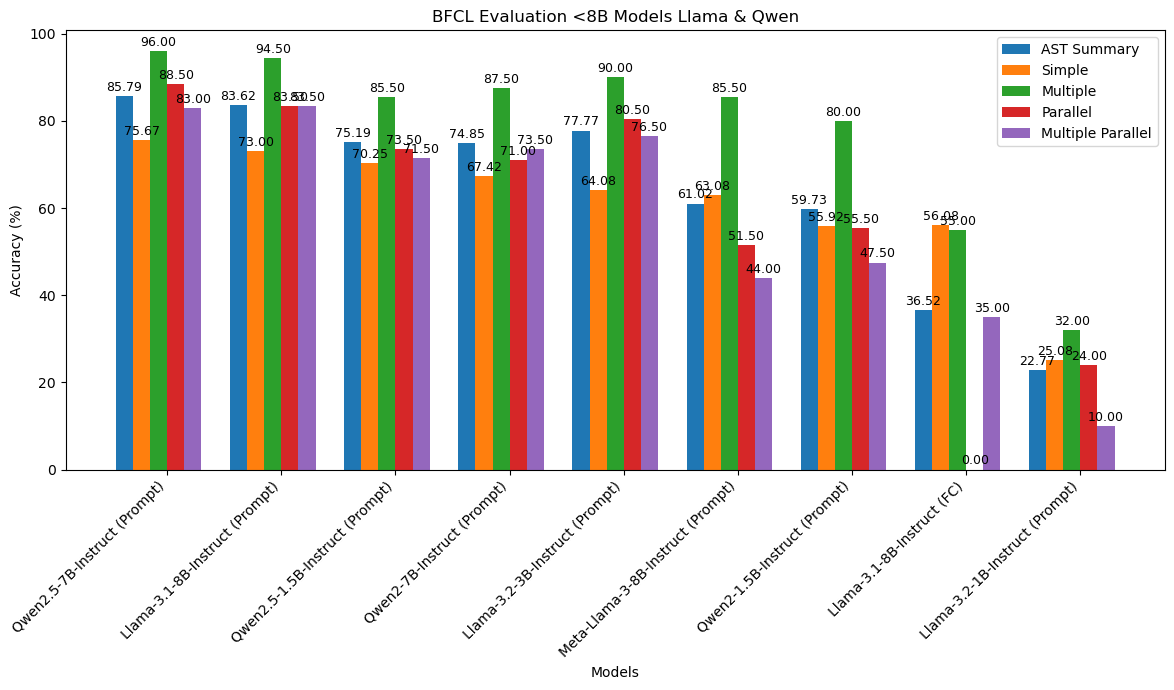

In [4]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Leggi il file CSV in un DataFrame
df = pd.read_csv('leaderboard.csv')

# Definisci i pattern per i due filtri
pattern_original = re.compile(r'\b(\w+-)?(8B|7B|6B|5B|4B|3B|1\.5B|1B)\b', re.IGNORECASE)
pattern_new = re.compile(r'\b(qwen\d*(?:\.\d+)?|llama(?![^ ]*70B)\d*(?:\.\d+)?)\b', re.IGNORECASE)

# Imposta il filtro da usare (True per il nuovo filtro, False per il filtro originale)
use_new_filter = True

# Applica il filtro scelto
if use_new_filter:
    filtered_df = df[
        df['Model'].apply(lambda x: bool(pattern_new.search(x)) and "hermes" not in x.lower())
    ]
    title = 'BFCL Evaluation <8B Models Llama & Qwen'
else:
    filtered_df = df[df['Model'].apply(lambda x: bool(pattern_original.search(x)))]
    title = 'BFCL Evaluation <8B Models'

#####

# Define the specific models to extract
model_names = ["Qwen2.5-1.5B-Instruct (Prompt)"]

# Extract the rows for the specific models
models_data = filtered_df.loc[filtered_df['Model'].isin(model_names)]

# Save the extracted data to a new CSV file
output_file = 'leaderboard-mymodels.csv'
models_data.to_csv(output_file, index=False)

#####


# Mostra il DataFrame filtrato
categories = filtered_df['Model'].tolist()
metrics = [ 'AST Summary', 'Simple', 'Multiple', 'Parallel', 'Multiple Parallel']

data = filtered_df[metrics].values

metrics_2 = ['Model', 'AST Summary', 'Simple', 'Multiple', 'Parallel', 'Multiple Parallel']
print(filtered_df[metrics_2])

# Imposta la larghezza delle barre e la figura
bar_width = 0.15
fig, ax = plt.subplots(figsize=(12, 7))
x = np.arange(len(categories))

# Traccia ogni metrica come un gruppo di barre
for i, metric in enumerate(metrics):
    y_values = data[:, i]
    bars = ax.bar(x + i * bar_width, y_values, width=bar_width, label=metric)
    
    # Aggiungi i valori su ogni barra
    for j, bar in enumerate(bars):
        ax.text(bar.get_x() + bar.get_width() / 2,  # Posizionamento centrato sulla barra
                bar.get_height() + 0.5,             # Altezza leggermente sopra la barra
                f'{y_values[j]:.2f}',              # Valore formattato
                ha='center', va='bottom', fontsize=9)

# Imposta etichette, titolo e legenda
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy (%)')
ax.set_title(title)
ax.set_xticks(x + bar_width * (len(metrics) / 2))
ax.set_xticklabels(categories, rotation=45, ha='right')
ax.legend()

# Mostra il grafico
plt.tight_layout()
plt.show()